# <center>Analyse des ventes d'une librairie</center>

# <center>Demandes de Julie --> Recherche de corrélations, pour voir s’il n’y a pas certains points que nous pourrions analyser.</center>

*Julie indique dans son mail:*

*J’aimerais que tu regardes en particulier*

*-Le liens entre le genre d'un clients et les catégories des livres achetés*

*-Le liens entre l'âge des clients et le montant total des achats, la fréquence d'achat, la taille du panier moyen et les catégories des livres achetés.*

## Importation des librairies

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des dataset

In [2]:
customers = pd.read_csv("customers.csv")

products = pd.read_csv("products.csv")

transactions = pd.read_csv("transactions.csv")

df = pd.read_csv("df_post_antoine.csv")

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

***

***

## <center>Recherche de corrélations</center>

### ***Je vais dans un premier temps regarder la distribution de mes données.***

*-genre d'un client*

*-catégories des livres achetés*

*-montant total des achats*

*-fréquence d'achat*

*-taille du panier moyen*

*-l'âge des clients*

### Le genre de la clientèle est une variables qualitative, ayant 2 possibilités.

In [4]:
dfcopy = df.copy()

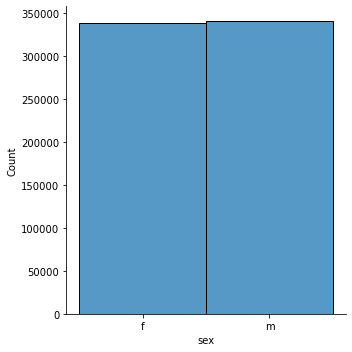

In [5]:
sns.displot(dfcopy.sex)

### Les catégories de livres sont des variables qualitatives, ayant 3 possibilités.

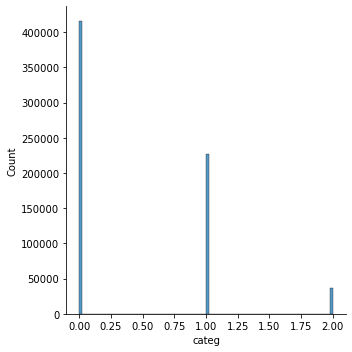

In [6]:
sns.displot(dfcopy.categ)

### Le montant total des achats (qu'un client peut faire) est une variable quantitatives.

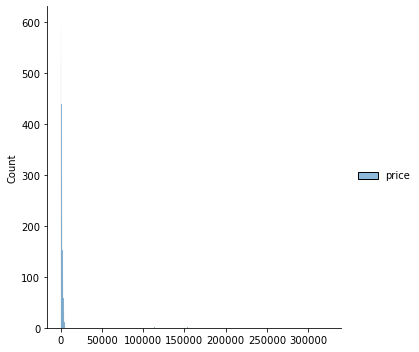

In [7]:
ma = pd.pivot_table(dfcopy, values='price', index ="client_id", aggfunc=np.sum)
ma
sns.displot(ma)

In [8]:
from scipy.stats import kurtosis
from scipy.stats import skew

print(skew(ma, bias=False), "skew > 0 --> More weight in the left tail of the distribution")
print(kurtosis(ma, bias=False), "kutosis > 0 --> Leptokurtic (more than normal dist hight)")

[52.23869342] skew > 0 --> More weight in the left tail of the distribution
[2972.53506039] kutosis > 0 --> Leptokurtic (more than normal dist hight)


### La fréquence d'achat est une variable quantitative.

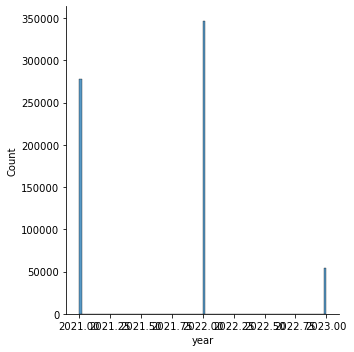

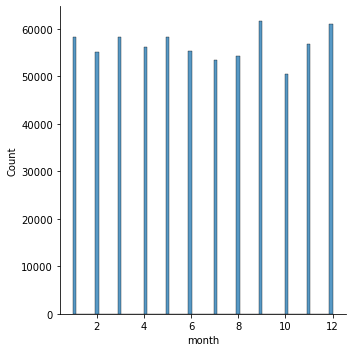

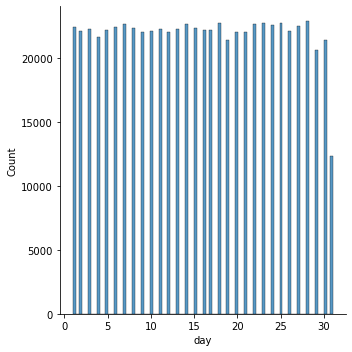

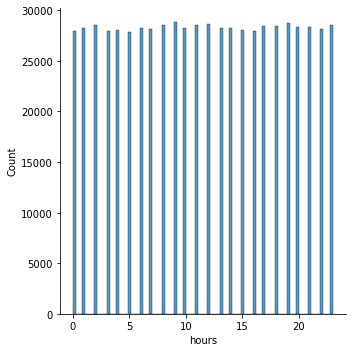

In [9]:
sns.displot(dfcopy.year)
sns.displot(dfcopy.month)
sns.displot(dfcopy.day)
sns.displot(dfcopy.hours)

### La taille du panier moyen est une variable quantitative.

In [10]:
pm = dfcopy.copy()
pm.drop(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth',
       'categ', 'hours', 'minutes', 'day', 'month', 'year',
       'ages_range', 'prices_range'], axis = 1, inplace = True)
pm = pd.pivot_table(pm, values='price', index ="age", aggfunc=np.mean)
pm

,price
age,
18,40.201577
19,40.767737
20,40.161177
21,41.979704
22,37.380738
...,...
89,16.111131
90,16.216045
91,16.561471


<AxesSubplot:xlabel='age'>

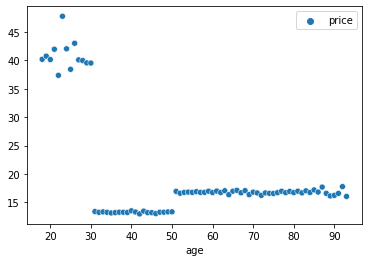

In [11]:
sns.scatterplot(data=pm)

### L'âge des clients est une variable quantitative.

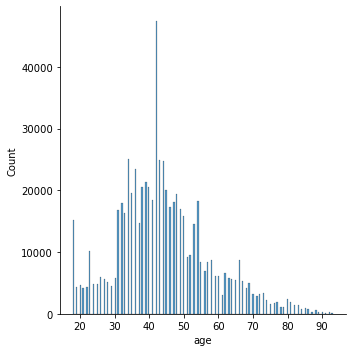

In [12]:
sns.displot(dfcopy.age)

In [13]:
from scipy.stats import kurtosis
from scipy.stats import skew

print(skew(dfcopy.age, bias=False), "skew > 0 --> More weight in the left tail of the distribution")
print(kurtosis(dfcopy.age, bias=False), "kutosis > 0 --> Leptokurtic (more than normal dist hight)")

0.5683712380588848 skew > 0 --> More weight in the left tail of the distribution
0.4187075733102583 kutosis > 0 --> Leptokurtic (more than normal dist hight)


### Le liens entre le genre d'un clients et les catégories des livres achetés.

*Le test choisi est le test de chi2 car il permet de vérifier la corrélation entre 2 variables qualitatives.*

In [14]:
from scipy.stats import chi2_contingency 

In [15]:
#create contingency table
cont_table = pd.crosstab(index=dfcopy['sex'], columns=dfcopy['categ'])
cont_table

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


*expected = The expected frequencies, based on the marginal sums of the table.*

*dof = Degree of Freedom*

*p = P-Value*

In [16]:
chi2, p, dof, ex = chi2_contingency(cont_table, correction=False)
print("The chi² value is", chi2)
print("The P-Value is", p)
print("The Degree of Freedom is", dof)
print("The Expected Values are", ex)

# P-Value
print("P-VALUE")
alpha = 0.05
print("Alpha=", alpha,  "P-Value=", p)
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

The chi² value is 147.00253568681114
The P-Value is 1.1989607410166063e-32
The Degree of Freedom is 2
The Expected Values are [[207066.56444861 113161.81769444  18173.61785695]
 [208613.43555139 114007.18230556  18309.38214305]]
P-VALUE
Alpha= 0.05 P-Value= 1.1989607410166063e-32
Dependent (reject H0)


*Il y a un liens entre le genre d'un clients et les catégories des livres achetés.*

### Le liens entre l'âge des clients et le montant total des achats.

*Le test choisie est le Spearman's test car il permet connaitre la corrélation entre 2 variables quantitatives dont la distribution n'est pas normale.*

In [17]:
# +1	Complete positive correlation
# 0	No correlation
# -1	Complete negative correlation

# What do the terms positive and negative mean? 
# Positive correlation implies that as one variable increases as the other increases as well. 
# Inversely, a negative correlation implies that as one variable increases, the other decreases.

corr = dfcopy.copy()
corr.drop(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth',
       'categ', 'hours', 'minutes', 'day', 'month', 'year',
       'ages_range', 'prices_range'], axis = 1, inplace = True)
corr.corr(method="spearman")

,age,price
age,1.000000,-0.054885
price,-0.054885,1.000000


*Il n'y a pas réellement de correlation entre l'âge des clients et le montant total des achats.*

### Le liens entre l'âge des clients et la fréquence d'achat.

*Le test choisie est le Spearman's test car il permet connaitre la corrélation entre 2 variables quantitatives dont la distribution n'est pas normale.*

In [18]:
# +1	Complete positive correlation
# 0	No correlation
# -1	Complete negative correlation

# What do the terms positive and negative mean? 
# Positive correlation implies that as one variable increases as the other increases as well. 
# Inversely, a negative correlation implies that as one variable increases, the other decreases.

corr = dfcopy.copy()
corr.drop(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth', 'price',
       'categ'], axis = 1, inplace = True)
corr.corr(method="spearman")

,age,hours,minutes,day,month,year
age,1.000000,0.005996,0.001729,-0.004845,0.002874,0.002716
hours,0.005996,1.000000,0.000839,0.000372,0.001716,0.000516
minutes,0.001729,0.000839,1.000000,-0.000678,0.000139,0.000261
day,-0.004845,0.000372,-0.000678,1.000000,0.017971,-0.017977
month,0.002874,0.001716,0.000139,0.017971,1.000000,-0.351088
year,0.002716,0.000516,0.000261,-0.017977,-0.351088,1.000000


*Il n'y a pas de correlation entre l'âge des clients et la fréquence d'achat.*

### Le liens entre l'âge des clients et la taille du panier moyen.

*Le test choisie est le Spearman's test car il permet connaitre la corrélation entre 2 variables quantitatives dont la distribution n'est pas normale.*

In [19]:
pm = dfcopy.copy()
pm.drop(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth',
       'categ', 'hours', 'minutes', 'day', 'month', 'year',
       'ages_range', 'prices_range'], axis = 1, inplace = True)
pm = pd.pivot_table(pm, values='price', index ="age", aggfunc=np.mean)
pm.reset_index(inplace = True)
pm
# +1	Complete positive correlation
# 0	No correlation
# -1	Complete negative correlation

# What do the terms positive and negative mean? 
# Positive correlation implies that as one variable increases as the other increases as well. 
# Inversely, a negative correlation implies that as one variable increases, the other decreases.

pm.corr(method="spearman")

,age,price
age,1.000000,-0.086015
price,-0.086015,1.000000


*Il n'y a pas de correlation entre l'âge des clients et la taille du panier moyen.*

### Le liens entre l'âge des clients et les catégories des livres achetés.

*Le test choisie est le test de ANOVA car il permet de comparer une variable quantitative à une variable qualitatives de plus de 2 groupes.*

*La variable quantitative n'a pas une distribution normale.*

*ANOVA couplé à Fisher c'est l'analyse de la variance.*

In [20]:
dfcopy.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,hours,minutes,day,month,year,ages_range,prices_range
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0,13,21,20,5,2022,31-40,0-49.99
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0,7,55,2,2,2022,31-40,0-49.99
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0,15,44,18,6,2022,51-60,0-49.99
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0,4,19,24,6,2021,17-25,50-99.99
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0,8,22,11,1,2023,41-50,0-49.99


<AxesSubplot:title={'center':'age'}, xlabel='categ'>

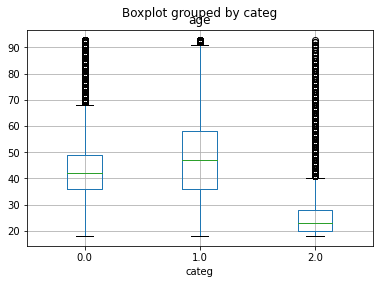

In [21]:
dfcopy.boxplot("age", by="categ")

In [22]:
anova = pd.crosstab(index=dfcopy['age'], columns=dfcopy['categ'])
anova

categ,0.0,1.0,2.0
age,,,
18,3418,5719,6012
19,909,1678,1784
20,1019,1723,1845
21,974,1550,1728
22,1116,1628,1671
...,...,...,...
89,143,183,1
90,132,177,2
91,77,91,2


In [23]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(anova[0.0], anova[1.0], anova[2.0])
print(fvalue, pvalue)

25.609647729622683 9.537988688247142e-11


*Il y a un liens entre le l'âge des clients et les catégories des livres achetés.*